In [46]:
import igraph as ig
import matplotlib.pyplot as plt
import networkx as nwx
from datetime import datetime
import numpy as np
from scipy.optimize import curve_fit
import sys
sys.path.append('../')
from package_global_functions import *

def powerLaw(x,a,b):
    return b*x**a

In [ ]:
g = ig.Graph.Erdos_Renyi(35,0.01)
fig, ax = plt.subplots()
ig.plot(g, target=ax)

In [18]:
# sparse network, i.e. small p: use fast_gnp_random_graph
# g = nwx.fast_gnp_random_graph(n=35, p=0.01, seed=123)
g = nwx.fast_gnp_random_graph(n=35, p=0.05, seed=123)

# for higher p, use erdos_renyi_graph (alias for gnp_random_graph)

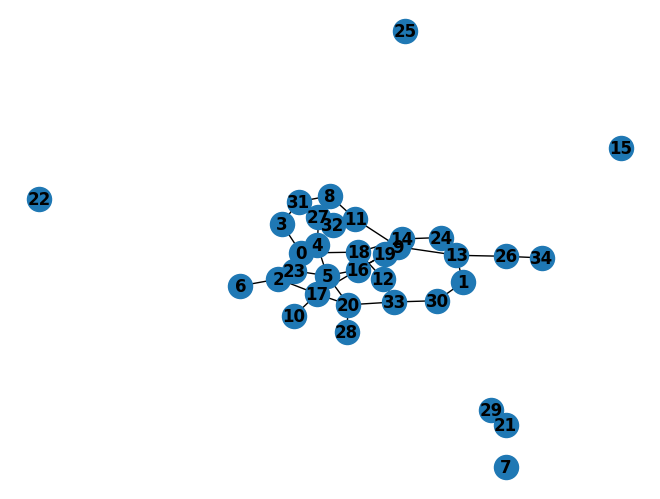

In [14]:
nwx.draw(g, with_labels=True, font_weight='bold')

In [21]:
nwx.betweenness_centrality(g)

{0: 0.8413547237076648,
 1: 0.5508021390374331,
 2: 0.0,
 3: 0.058823529411764705,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.16934046345811052,
 8: 0.058823529411764705,
 9: 0.2709447415329768,
 10: 0.0,
 11: 0.11586452762923351,
 12: 0.0,
 13: 0.0,
 14: 0.16934046345811052,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.11586452762923351,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.058823529411764705,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.058823529411764705,
 30: 0.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 0.0}

In [6]:
nwx.write_edgelist(g, 'provant.txt', data=False)

In [61]:
g = nwx.barabasi_albert_graph(n=35, m=6, seed=123)

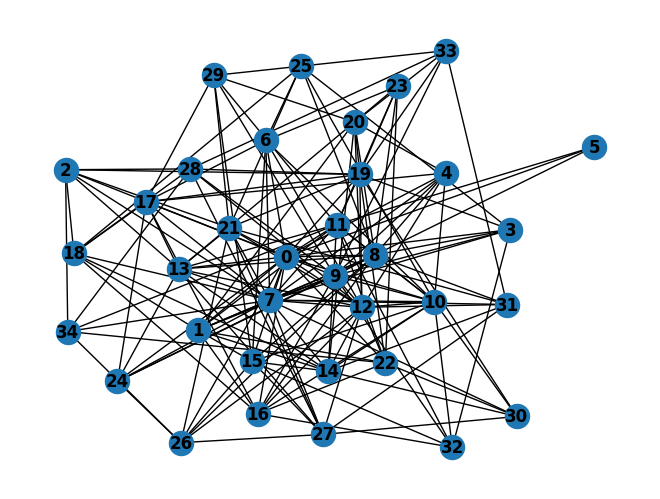

In [62]:
nwx.draw(g, with_labels=True, font_weight='bold')

In [29]:
N = 35
degrees = [int(round((N-1)*v,3)) for v in nwx.degree_centrality(g).values()]

In [60]:
N, m = 1000, 6
degreesp = []
for i in range(100):
    g = nwx.barabasi_albert_graph(n=N, m=2, seed=int(datetime.now().timestamp()))
    degrees = [int(round((N-1)*v,3)) for v in nwx.degree_centrality(g).values()]
    degreesp.extend(degrees)

pdf, bin_edges = np.histogram(degreesp, bins=N-1, range=(0,N-1), density=True)
ks = bin_edges[:-1][pdf > 0]
popt, _ = curve_fit(powerLaw, ks, pdf[pdf>0])
print(popt[0])

-2.2804633851769145
